In [2]:
#!/usr/bin/python

# data processing packages
import numpy as np   
import pandas as pd 
import scipy as sp

import pylab

from pandas import *
from numpy import *
from scipy import *

import random
import sys

# machine leanring packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import xgboost as xgb

# own utilities
from utils_dataPrepro import *
# from ml_models import *
#from utils_keras import *

# statiscal models
import statsmodels as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.api import VAR, DynamicVAR

from statsmodels.stats import diagnostic


# visulization
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import IPython
from IPython.display import display

/home/guo/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
# Ref:

# https://www.otexts.org/fpp
# stl a seasonal-trend decomposition based on loess: https://www.wessa.net/download/stl.pdf
# 
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

# http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016
# http://people.duke.edu/~rnau/411home.htm

In [10]:
# dataset_str = str(sys.argv[1])
# print "Load dataset %s"%dataset_str

dataset_str = "air"

file_dic = { "stock":0,\
             "power":1,\
             "air":2,\
           }

files_list=[]
files_list.append( ["../../dataset/dataset_ts/stock_xtrain.dat", \
            "../../dataset/dataset_ts/stock_xtest.dat"] )
                    
files_list.append( ["../../dataset/dataset_ts/power_xtrain.dat", \
            "../../dataset/dataset_ts/power_xtest.dat"] )
                    
files_list.append( ["../../dataset/dataset_ts/air_xtrain.dat", \
            "../../dataset/dataset_ts/air_xtest.dat"] )


xtr = np.load(files_list[ file_dic[dataset_str] ][0])
xts = np.load(files_list[ file_dic[dataset_str] ][1])

# xtrain, xtest, _, _ = \
# prepare_train_test_data( False, files_list[ file_dic[dataset_str] ])

print np.shape(xtr), np.shape(xts)


(7000, 8) (1600, 8)


In [104]:
def univariate_ts_plot( ts_list,title_str ):
    
    mplt.rcParams.update({'font.size': 15})
    figure_size = (10,5)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    tmpt = range( len(ts_list) )    
    plt.plot( tmpt, ts_list )

    plt.title( title_str )
    
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    
def multi_variate_ts_plot( ts_list,title_str ):
    
    mplt.rcParams.update({'font.size': 15})
    figure_size = (10,5)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    
    tmpt = range( len(ts_list) )  
    
    for i in range(len(ts_list[0])):
        
        tmp_dta =  [ts_list[j][i] for j in tmpt]
        
        plt.plot( tmpt, ts_list )
        
        plt.title( title_str )
    
        plt.ylabel('Value')
        plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
        plt.legend(loc='upper left')

def univariate_ts_scatter( ts_list,title_str ):
    
    mplt.rcParams.update({'font.size': 15})
    figure_size = (10,5)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
#     fig, ax = plt.subplots(figsize=(16,12))  
    
    tmpt = range( len(ts_list) )    
    plt.plot(tmpt, ts_list, marker='o', linestyle='--') 
#     plt.scatter( tmpt, ts_list )

    plt.title( title_str )
    
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')

7000
5528


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: pd.rolling_var is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=True).var()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=True).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: pd.rolling_var is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=True).var()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:53: FutureWarning: pd.rolling_mean is deprecated for DataFrame and 

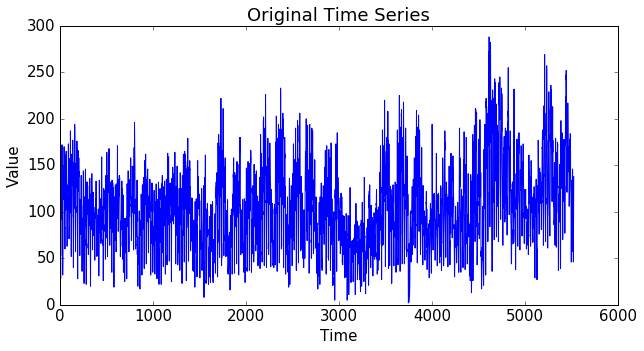

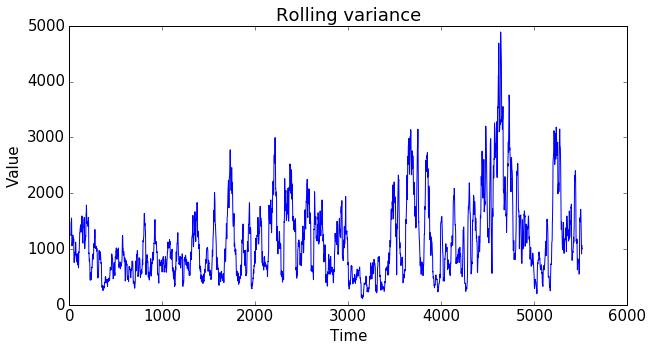

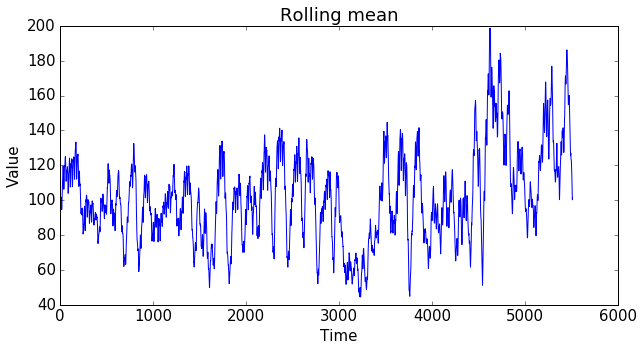

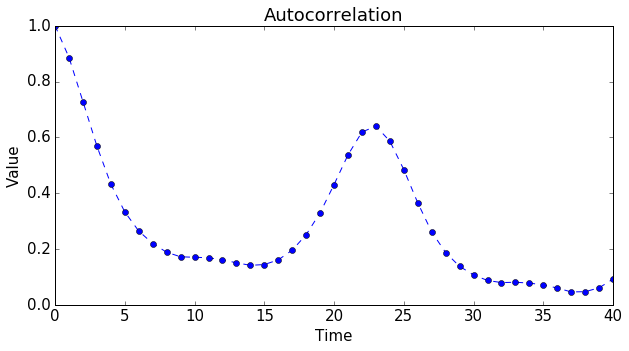

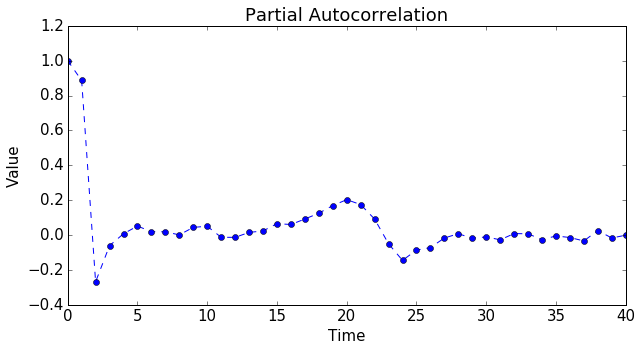

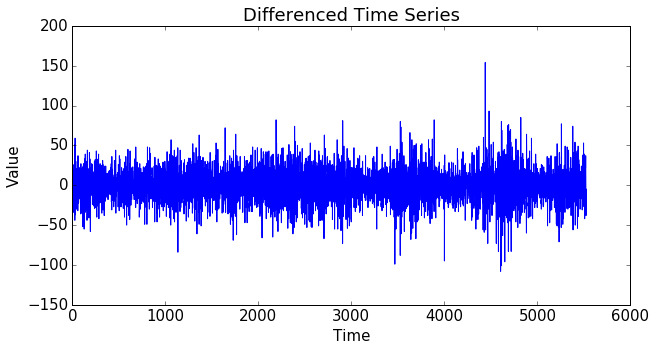

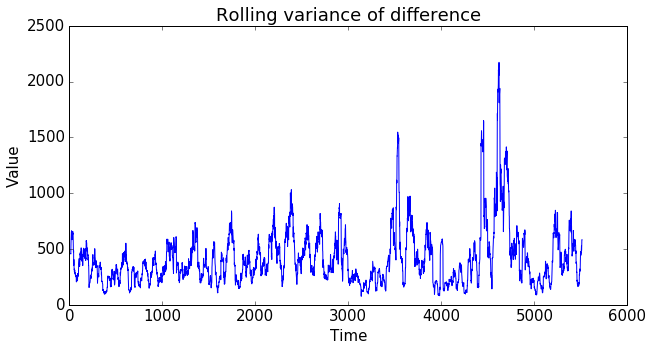

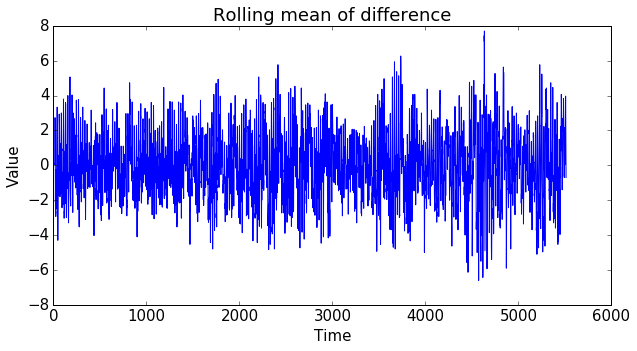

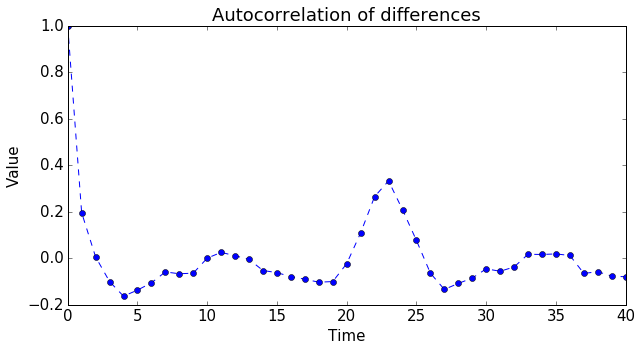

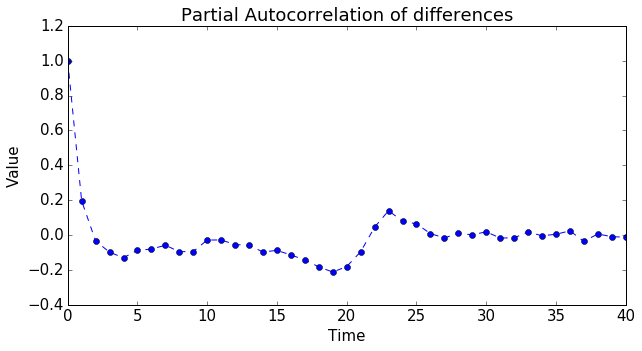

In [11]:
# Pre-processing 

uni_ts = [xtr[i][0] for i in xrange(len(xtr))]
print len(uni_ts)


# filter out the lower-boundary values
uni_ts = [i for i in uni_ts if i !=-200]
tr_length = len(uni_ts)
print tr_length


# --- original time series
ts_df = pd.DataFrame(uni_ts)
univariate_ts_plot( ts_df[1:],   'Original Time Series' )

# rolling variance 
roll_var = pd.rolling_var(ts_df, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var, 'Rolling variance' )

# rolling mean 
roll_var = pd.rolling_mean(ts_df, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var, 'Rolling mean' )

# auto-correlation
lag_corr  = acf( ts_df)  
lag_pcorr = pacf( ts_df )

univariate_ts_scatter( lag_corr,  'Autocorrelation' )
univariate_ts_scatter( lag_pcorr, 'Partial Autocorrelation' )


# --- log transformation if necessary, to linearize a trend

# ts_df = pd.DataFrame( log( ts_df ) )
# univariate_ts_plot( ts_df[1:],   'Logged Time Series' )

# --- seasonal difference

# --- 1-order differening, 1st-differencing of seasonal differenced 

ts_df_shift = ts_df.shift()
ts_df       = ts_df.iloc[1:tr_length]

ts_df_shift = ts_df_shift.iloc[1:tr_length]
ts_diff = ts_df_shift - ts_df

univariate_ts_plot( ts_diff[1:], 'Differenced Time Series' )

roll_var_diff = pd.rolling_var(ts_diff, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var_diff, 'Rolling variance of difference' )

roll_var_diff = pd.rolling_mean(ts_diff, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var_diff, 'Rolling mean of difference' )


lag_corr  = acf(  ts_diff)  
lag_pcorr = pacf( ts_diff )

univariate_ts_scatter( lag_corr,  'Autocorrelation of differences')
univariate_ts_scatter( lag_pcorr, 'Partial Autocorrelation of differences')



In [144]:
# ARIMA model 

para_ar_order = 2
para_ma_order = 2 

model = sm.tsa.arima_model.ARIMA( np.asarray(ts_df),\
                                  order=(para_ar_order, 1, para_ma_order))  
results = model.fit(disp= 1, trend = 'c')  
# print(results.summary())


# # Seansonal ARIMA
# mod = sm.tsa.statespace.SARIMAX(df.riders, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
# results = mod.fit()
# print results.summary()


In [ ]:
# ARIMA model selection

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]

def ARIMA_model_selection( pq_rng, d_rng ):
    
    model = sm.tsa.arima_model.ARIMA( np.asarray(ts_df),\
                                      order=(para_ar_order, 1, para_ma_order))  
    results = model.fit(disp= 1, trend = 'c')  
    
    min_aic = np.inf
    
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                
                model = sm.tsa.arima_model.ARIMA( np.asarray(ts_df),\
                                      order=(i, d, j)) 
                
                if d<=1:
                    results = model.fit(disp= 1, trend = 'c')  
                else:
#                   no constant term
                    results = model.fit(disp= 1, trend = 'c') 
                            
                tmp_aic = results.aic
                
                if tmp_aic < min_aic:
                    min_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = results
                    
    return min_aic, best_order, best_mdl        

[ 0.00420544  1.41258236 -0.56369664 -1.32368078  0.34276584]
[  8.94497874e-001   1.85133168e-271   3.75810781e-061   2.20320865e-188
   9.92382172e-015]
RMSE on training: 18.5591310401


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: pd.rolling_var is deprecated for ndarrays and will be removed in a future version
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


((array([-3.66138867, -3.42761901, -3.29885487, ...,  3.29885487,
          3.42761901,  3.66138867]),
  array([-144.66591853,  -89.49719345,  -87.16500485, ...,   98.48472113,
          118.16841405,  122.04772499])),
 (18.342804017472425, 0.013642689557774545, 0.98774131595817816))

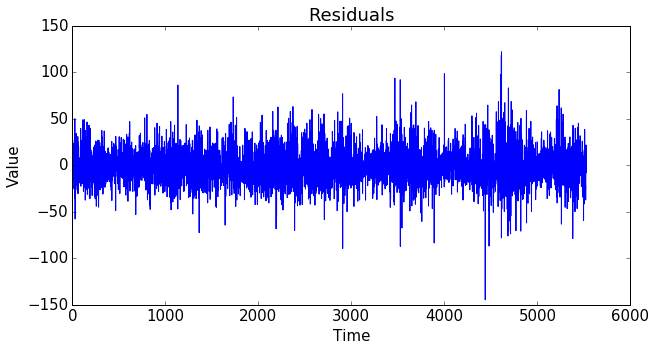

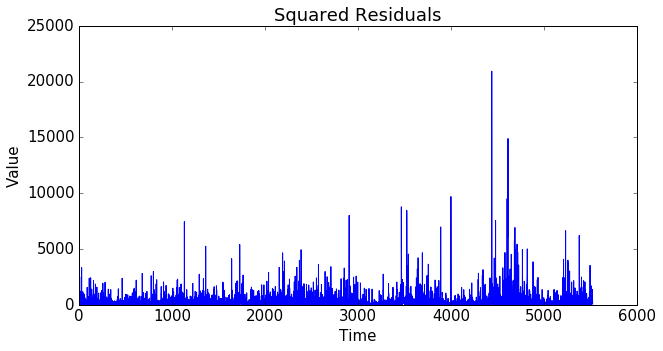

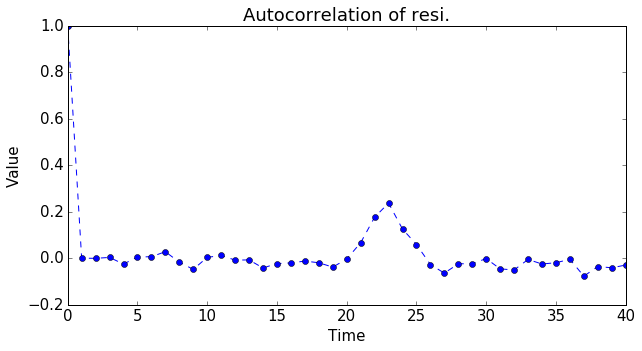

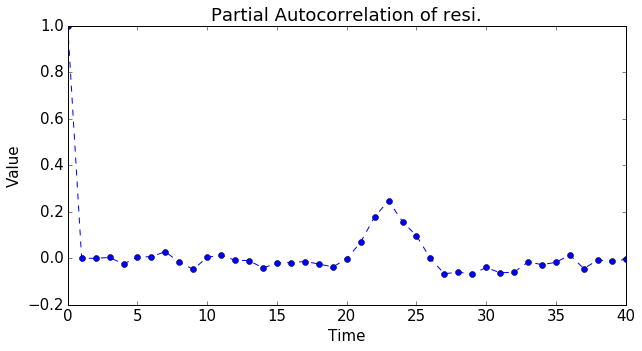

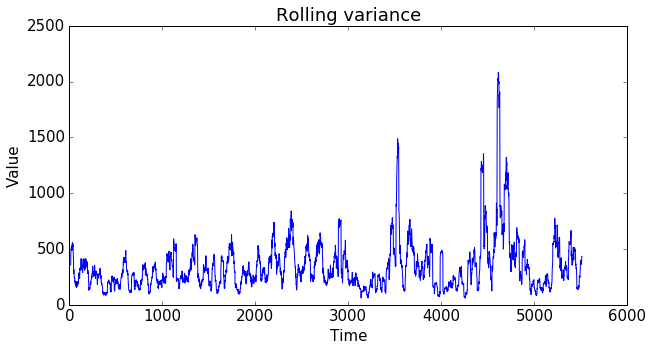

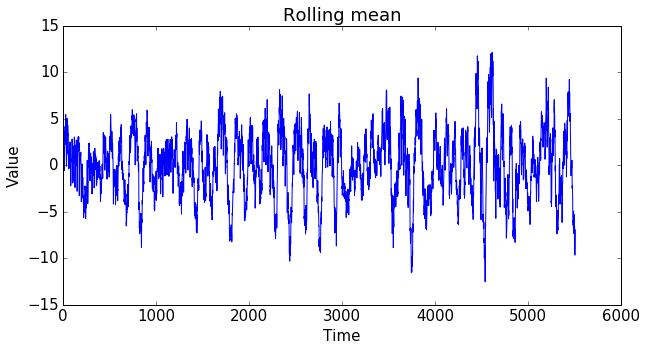

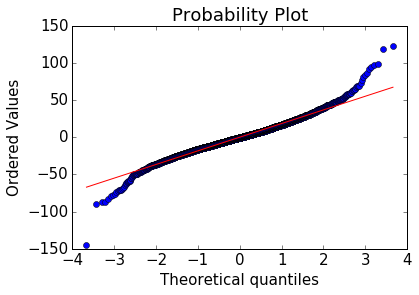

In [145]:
# ARIMA model investigation

print results.params

print results.pvalues

def rmse_cal(err_arr):
    return sqrt( sum(err_arr*err_arr)*1.0/len(err_arr) )

train_err =  model.geterrors( results.params )
print "RMSE on training:", rmse_cal(train_err)

univariate_ts_plot( results.resid, 'Residuals' )
univariate_ts_plot( results.resid*results.resid, 'Squared Residuals' )


univariate_ts_scatter( acf( results.resid),  'Autocorrelation of resi.' )
univariate_ts_scatter( pacf( results.resid), 'Partial Autocorrelation of resi.' )


# rolling variance
roll_var_diff = pd.rolling_var(results.resid, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var_diff, 'Rolling variance' )

# rolling mean 
roll_var = pd.rolling_mean(results.resid, 30, min_periods=None, freq=None, center=True)  
univariate_ts_plot( roll_var, 'Rolling mean' )

# QQ plot 
pylab.figure()
sp.stats.probplot(results.resid, dist="norm", plot=pylab)
# pylab.show()


# Ljungâ€“Box test on residuals to test auto-correlation
sm.stats.diagnostic.acorr_ljungbox(x, lags=None, boxpierce=False)


Multi-step RMSE on testing: 146.854067984
One-step RMSE on testing 99.0222300492


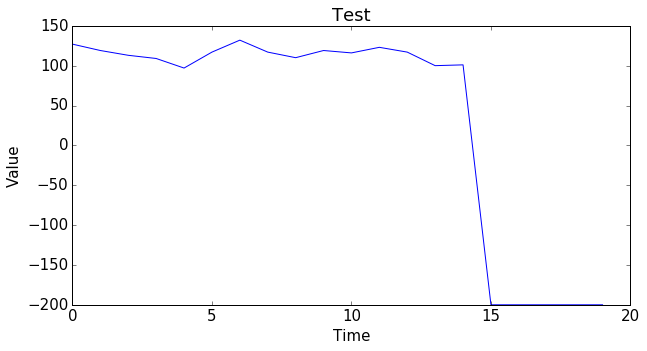

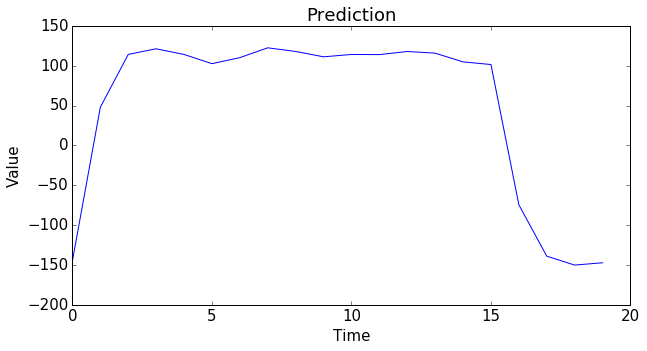

In [125]:
# ARIMA model forecasting 

def transform_back_difference_one(ts_pred, ts_train, ts_test):    
    return ts_pred

uni_ts_tt = [xts[i][0] for i in xrange(len(xts))]

# --- Multi-step ahead
para_test_length = 20

uni_ts_pred = model.predict(results.params,start=0,\
                        end= para_test_length,dynamic=False)

test_err = uni_ts_tt[:para_test_length + 1] - uni_ts_pred

print "Multi-step RMSE on testing:", rmse_cal(test_err)


# --- One-step ahead

# walk forward over time steps in test
para_ar_order = 2
para_ma_order = 2 
para_test_length = 20

ar_coef = results.arparams
mv_coef = results.maparams
const_coef = results.params[0]

uni_ts_pred = []
uni_ts_tr = uni_ts

for i in range( para_test_length ) :
    
    model = sm.tsa.arima_model.ARIMA( np.asarray(uni_ts_tr),\
                            order=(para_ar_order, 0, para_ma_order))  

    results = model.fit(disp= 1, trend = 'c')  
        
    uni_ts_pred.append(results.forecast()[0][0] ) 
    
    uni_ts_tr.append( uni_ts_tt[i] )
    
error=sqrt(mean_squared_error(uni_ts_tt[:para_test_length], uni_ts_pred))

print 'One-step RMSE on testing', error


univariate_ts_plot( uni_ts_tt[:para_test_length], 'Test' )
univariate_ts_plot( uni_ts_pred, 'Prediction' )

In [12]:
# Statistical test 

# Ideally, this should involve using a test (such as the ADF test) 
# for which the null hypothesis is non-stationarity; 
# as well as a test (such as the KPSS test) 
# for which the null is stationarity. 


# Pre-processing 

tsx = [xtr[i][0] for i in xrange(len(xtr))]
tsy = [xtr[i][1] for i in xrange(len(xtr))]

ts_df = pd.DataFrame(xtr)

print 'X sereis:\n'

# adf
# null test:  there is a unit root
print 'ADF test:\n', sm.tsa.stattools.adfuller(np.asarray(ts_df[0]),\
                                               regression='c',\
                                    maxlag=None, store=False, autolag='AIC')
# kpss
# null is stationarity, no deterministic trend component
print 'KPSS test:\n', sm.tsa.stattools.kpss(np.asarray(ts_df[0]),\
                                            regression='c', \
                                    lags=None, store=False)


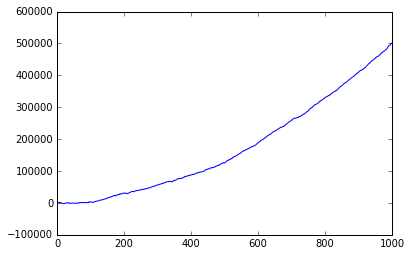

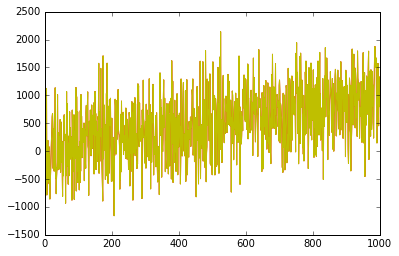

In [3]:
# Non-stationarity investigation

x = [10]
w = 0.1
n = 1000
for i in range(n):
    px = x[-1]
    x.append( px + i + np.random.normal(scale = 500) )
    
plt.plot( range(n+1), x, color='b' )


# ---

plt.figure()

dx= np.diff(x)

plt.plot( range(n), dx, color='r' )

tmpx = x[1:]
tmpx1 = x[:-1]

dx1 =  [ tmpx[i]- tmpx1[i] for i in range(n) ]

plt.plot( range(n), dx1, color='y' )

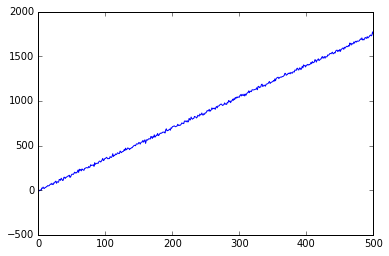

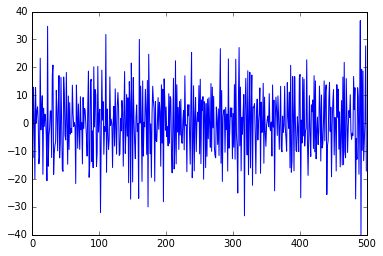

In [4]:
# Non-stationarity investigation

x = [10]
y = [10]

wx = 0.1
wt = 5

n = 500

alpha = 0.3

for i in range(n):
    x.append( wx*x[-1] + np.random.normal(scale = 10))
    y.append( alpha*x[-1] + (1-alpha)*wt*i + np.random.normal(scale = 10) )
    
plt.plot( range(n+1), y )

# ---

plt.figure()

dx= np.diff(x)

plt.plot( range(n), dx )

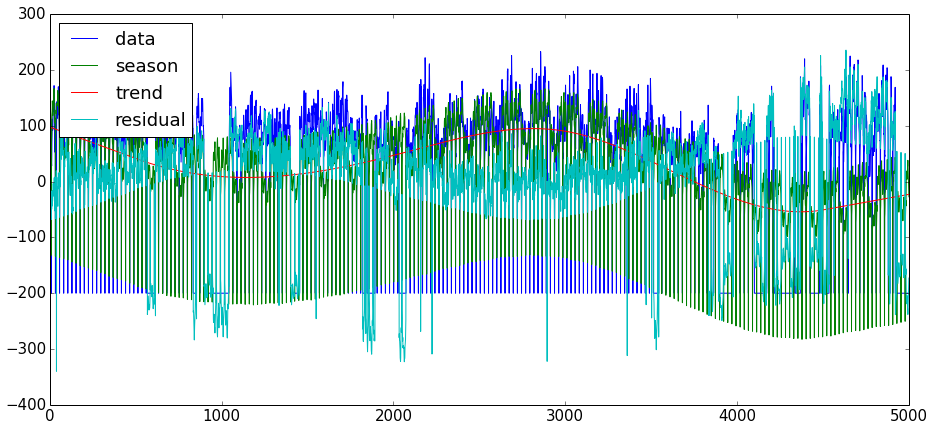

In [23]:
# DECOMPOSITION, numerical 

# https://github.com/welch/seasonal
from seasonal import fit_seasons, adjust_seasons

s = tmp
# detrend and deseasonalize
seasons, trend = fit_seasons(s)
adjusted = adjust_seasons(s, seasons=seasons, )
residual = adjusted - trend

mplt.rcParams.update({'font.size': 15})
figure_size = (15.4,7)
legend_font = 8.5
fig = plt.figure()

fig = plt.figure()
fig.set_size_inches( figure_size )

plt.plot(s, label='data')
# plt.plot(s - residual, label='trend+season')
plt.plot(s - residual, label='season')
plt.plot(trend, label='trend')
plt.plot(residual, label='residual')
plt.legend(loc='upper left')
